In [ ]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 93.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 671.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE166nnn/GSE166766/suppl/GSE166766_RAW.tar -O GSE166766_RAW.tar

--2025-12-08 09:34:23--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE166nnn/GSE166766/suppl/GSE166766_RAW.tar
           => ‘GSE166766_RAW.tar’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE166nnn/GSE166766/suppl ... done.
==> SIZE GSE166766_RAW.tar ... 838123520
==> PASV ... done.    ==> RETR GSE166766_RAW.tar ... done.
Length: 838123520 (799M) (unauthoritative)

GSE166766_RAW.tar   100%[===================>] 799.30M  80.5MB/s    in 8.7s    

2025-12-08 09:34:32 (92.4 MB/s) - ‘GSE166766_RAW.tar’ saved [838123520]



In [ ]:
!mkdir -p GSM5082289_MOCK
!mkdir -p GSM5082290_1dpi
!mkdir -p GSM5082291_2dpi
!mkdir -p GSM5082292_3dpi

In [ ]:
!tar -xvf GSE166766_RAW.tar

GSM5082289_mock_barcodes.tsv.gz
GSM5082289_mock_features.tsv.gz
GSM5082289_mock_matrix.mtx.gz
GSM5082290_1dpi_barcodes.tsv.gz
GSM5082290_1dpi_features.tsv.gz
GSM5082290_1dpi_matrix.mtx.gz
GSM5082291_2dpi_barcodes.tsv.gz
GSM5082291_2dpi_features.tsv.gz
GSM5082291_2dpi_matrix.mtx.gz
GSM5082292_3dpi_barcodes.tsv.gz
GSM5082292_3dpi_features.tsv.gz
GSM5082292_3dpi_matrix.mtx.gz


In [ ]:
!mv GSM5082289_mock_barcodes.tsv.gz GSM5082289_MOCK/barcodes.tsv.gz
!mv GSM5082289_mock_features.tsv.gz GSM5082289_MOCK/features.tsv.gz
!mv GSM5082289_mock_matrix.mtx.gz GSM5082289_MOCK/matrix.mtx.gz
#move 1dpi files into directory
!mv GSM5082290_1dpi_barcodes.tsv.gz GSM5082290_1dpi/barcodes.tsv.gz
!mv GSM5082290_1dpi_features.tsv.gz GSM5082290_1dpi/features.tsv.gz
!mv GSM5082290_1dpi_matrix.mtx.gz GSM5082290_1dpi/matrix.mtx.gz
#move 2dpi files into directory
!mv GSM5082291_2dpi_barcodes.tsv.gz GSM5082291_2dpi/barcodes.tsv.gz
!mv GSM5082291_2dpi_features.tsv.gz GSM5082291_2dpi/features.tsv.gz
!mv GSM5082291_2dpi_matrix.mtx.gz GSM5082291_2dpi/matrix.mtx.gz
#move 3dpi files into directory
!mv GSM5082292_3dpi_barcodes.tsv.gz GSM5082292_3dpi/barcodes.tsv.gz
!mv GSM5082292_3dpi_features.tsv.gz GSM5082292_3dpi/features.tsv.gz
!mv GSM5082292_3dpi_matrix.mtx.gz GSM5082292_3dpi/matrix.mtx.gz

In [ ]:
mock_data = sc.read_10x_mtx('/content/GSM5082289_MOCK')
dpi1 = sc.read_10x_mtx('/content/GSM5082290_1dpi')
dpi2 = sc.read_10x_mtx('/content/GSM5082291_2dpi')
dpi3 = sc.read_10x_mtx('/content/GSM5082292_3dpi')

In [ ]:
mock_data.var['MT'] = mock_data.var_names.str.startswith("MT-")
dpi1.var['MT'] = dpi1.var_names.str.startswith("MT-")
dpi2.var['MT'] = dpi2.var_names.str.startswith("MT-")
dpi3.var['MT'] = dpi3.var_names.str.startswith("MT-")

In [ ]:
mt_genes = mock_data.var_names[mock_data.var['MT']]
mt_genes1 = dpi1.var_names[dpi1.var['MT']]
mt_genes2 = dpi2.var_names[dpi2.var['MT']]
mt_genes3 = dpi3.var_names[dpi3.var['MT']]
print(mt_genes)
print(mt_genes1)
print(mt_genes2)
print(mt_genes3)

Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')
Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')
Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')
Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')


In [ ]:
sc.pp.calculate_qc_metrics(mock_data, qc_vars= ["MT"], inplace = True, log1p= True)
sc.pp.calculate_qc_metrics(dpi1, qc_vars=["MT"], inplace = True, log1p= True)
sc.pp.calculate_qc_metrics(dpi2, qc_vars= ["MT"], inplace= True, log1p = True)
sc.pp.calculate_qc_metrics(dpi3, qc_vars= ["MT"], inplace = True, log1p = True)

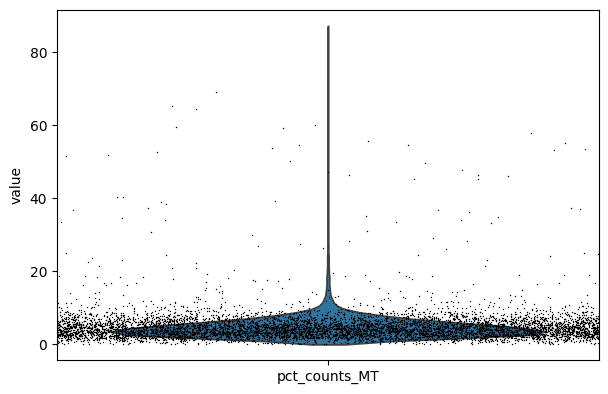

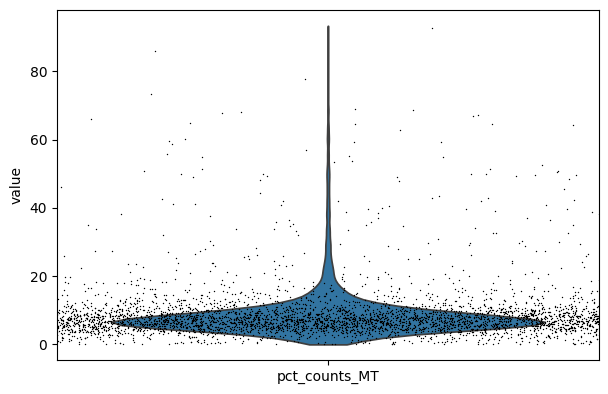

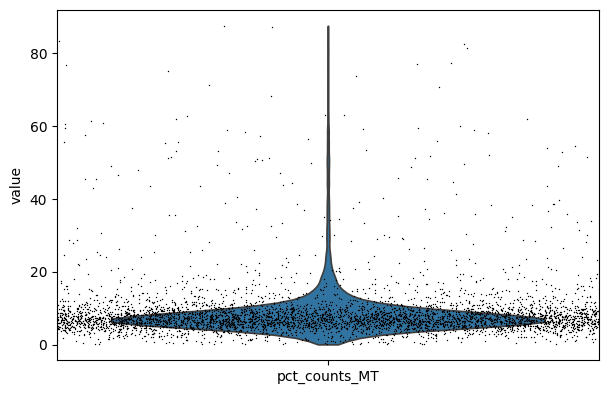

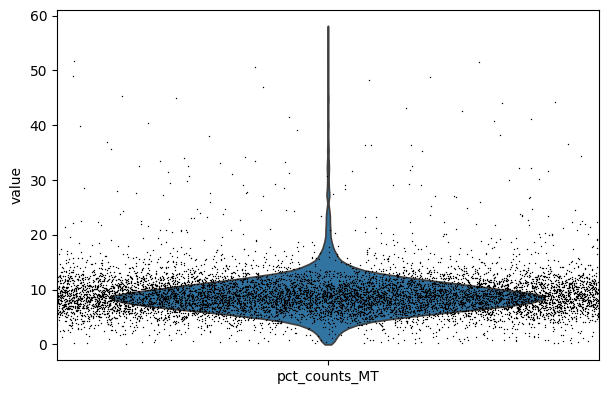

In [ ]:
sc.pl.violin(mock_data, ["pct_counts_MT"], jitter= 1.5, multi_panel= False)
sc.pl.violin(dpi1, ["pct_counts_MT"], jitter = 1.5, multi_panel= False)
sc.pl.violin(dpi2, ["pct_counts_MT"], jitter = 1.5, multi_panel= False)
sc.pl.violin(dpi3, ["pct_counts_MT"], jitter = 1.5, multi_panel= False)

In [ ]:
sc.pl.scatter(mock_data, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")
sc.pl.scatter(dpi1, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")
sc.pl.scatter(dpi2, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")
sc.pl.scatter(dpi3, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")

In [ ]:
mock_data= mock_data[mock_data.obs.pct_counts_MT<10, :]
dpi1 = dpi1[dpi1.obs.pct_counts_MT<10, :]
dpi2= dpi2[dpi2.obs.pct_counts_MT<10, :]
dpi3= dpi3[dpi3.obs.pct_counts_MT<10, :]

In [ ]:
# #filter cells and genes
sc.pp.filter_cells(mock_data, min_genes = 200)
sc.pp.filter_genes(mock_data, min_cells=3)
# #dpi1
sc.pp.filter_cells(dpi1, min_genes = 200)
sc.pp.filter_genes(dpi1, min_cells = 3)
# #dpi2
sc.pp.filter_cells(dpi2, min_genes = 200)
sc.pp.filter_genes(dpi2, min_cells = 3)
#dpi3
sc.pp.filter_cells(dpi3, min_genes = 200)
sc.pp.filter_genes(dpi3, min_cells=3)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


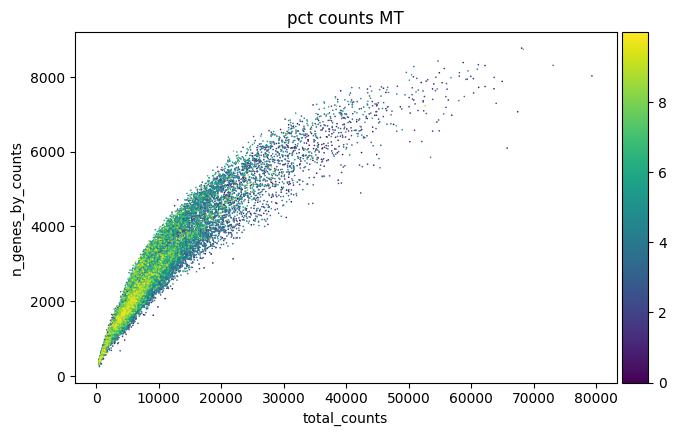

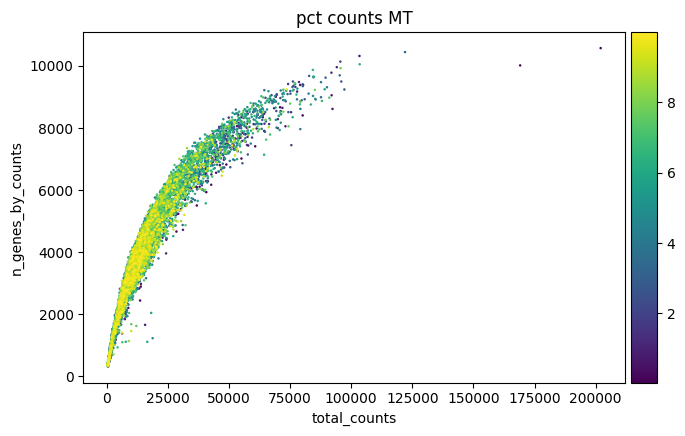

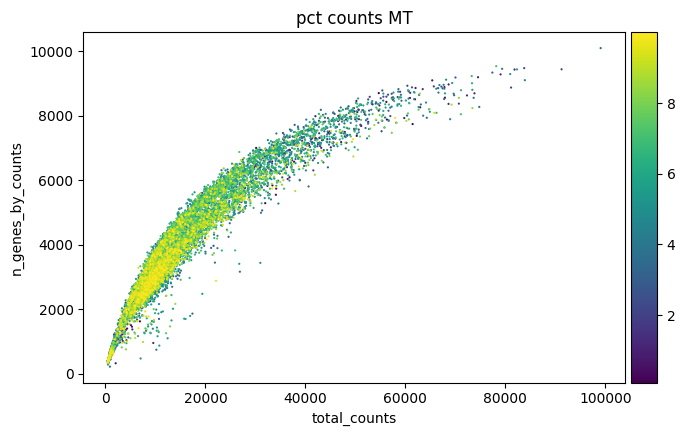

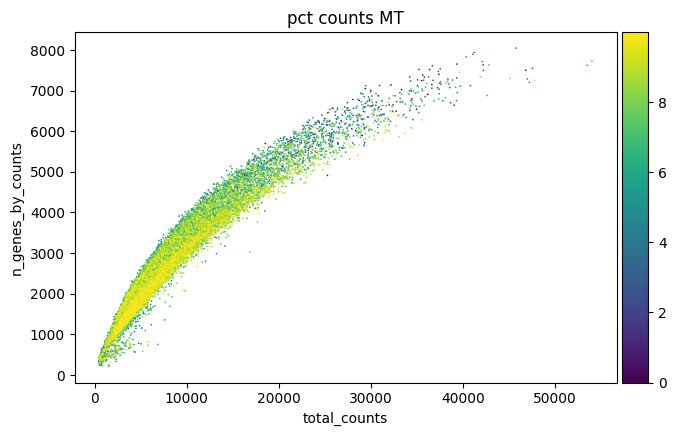

In [ ]:
#Verify after filtering
sc.pl.scatter(mock_data, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")
sc.pl.scatter(dpi1, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")
sc.pl.scatter(dpi2, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")
sc.pl.scatter(dpi3, "total_counts", "n_genes_by_counts", color = "pct_counts_MT")


In [ ]:
#save a copy of the raw data
mock_data.layers["counts"] = mock_data.X.copy()
dpi1.layers["counts"] = dpi1.X.copy()
dpi2.layers["counts"] = dpi2.X.copy()
dpi3.layers["counts"] = dpi3.X.copy()

In [ ]:
sc.pp.normalize_total(mock_data, target_sum=1e4)
sc.pp.normalize_total(dpi1, target_sum = 1e4)
sc.pp.normalize_total(dpi2, target_sum = 1e4)
sc.pp.normalize_total(dpi3, target_sum= 1e4)

In [ ]:
sc.pp.sqrt(mock_data)
sc.pp.sqrt(dpi1)
sc.pp.sqrt(dpi2)
sc.pp.sqrt(dpi3)

In [ ]:
sc.tl.pca(mock_data, n_comps = 50)
sc.tl.pca(dpi1, n_comps = 50)
sc.tl.pca(dpi2, n_comps = 50)
sc.tl.pca(dpi3, n_comps = 50)

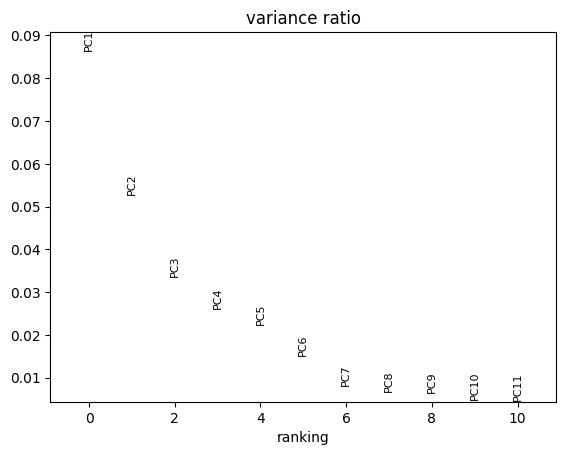

In [ ]:
sc.pl.pca_variance_ratio(mock_data, n_pcs=10)

In [ ]:
sc.pp.neighbors(mock_data)
sc.pp.neighbors(dpi1)
sc.pp.neighbors(dpi2)
sc.pp.neighbors(dpi3)

In [ ]:
sc.tl.umap(mock_data, min_dist= 0.5)
sc.tl.umap(dpi1, min_dist = 0.5)
sc.tl.umap(dpi2, min_dist = 0.5)
sc.tl.umap(dpi3, min_dist = 0.5)

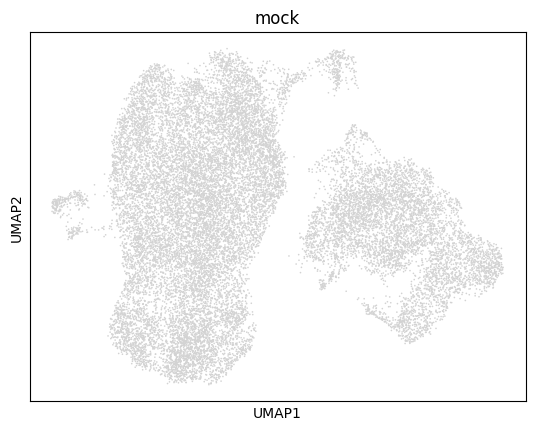

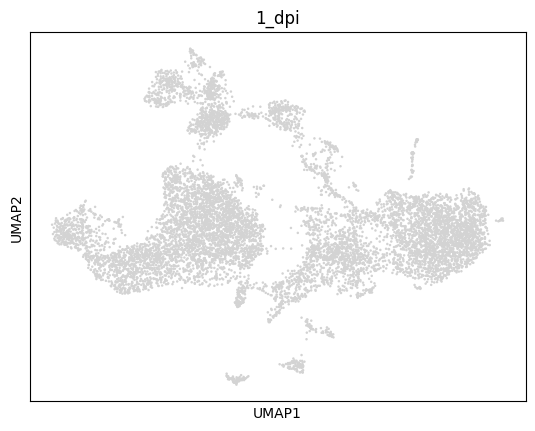

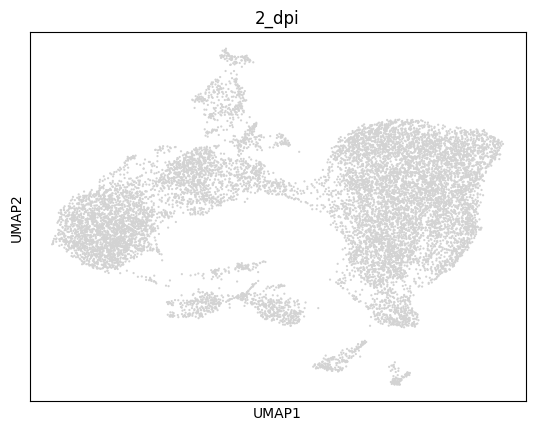

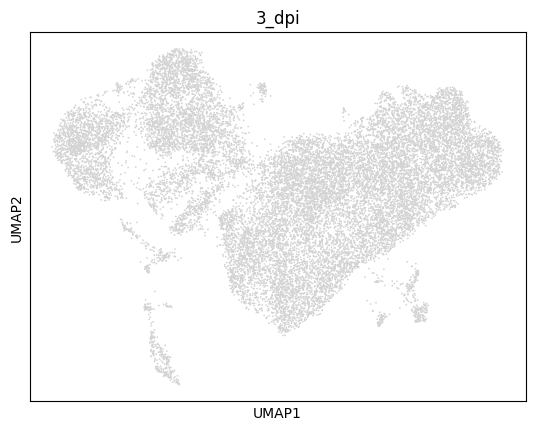

In [ ]:
sc.pl.umap(mock_data, title= "mock")
sc.pl.umap(dpi1, title = "1_dpi")
sc.pl.umap(dpi2, title = "2_dpi")
sc.pl.umap(dpi3, title= "3_dpi")

In [ ]:
sc.tl.louvain(mock_data, resolution= 0.5)
sc.tl.louvain(dpi1, resolution = 0.5)
sc.tl.louvain(dpi2, resolution = 0.5)
sc.tl.louvain(dpi3, resolution= 0.5)


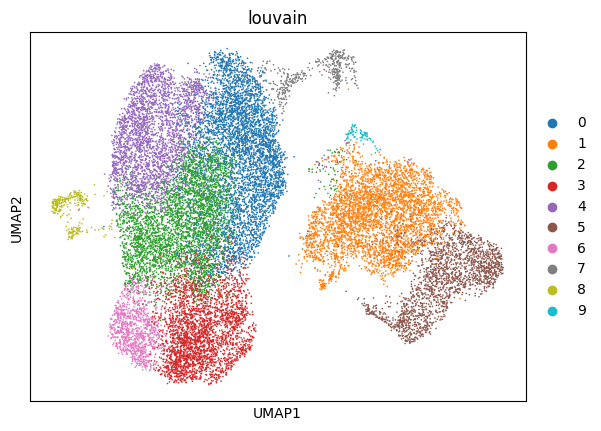

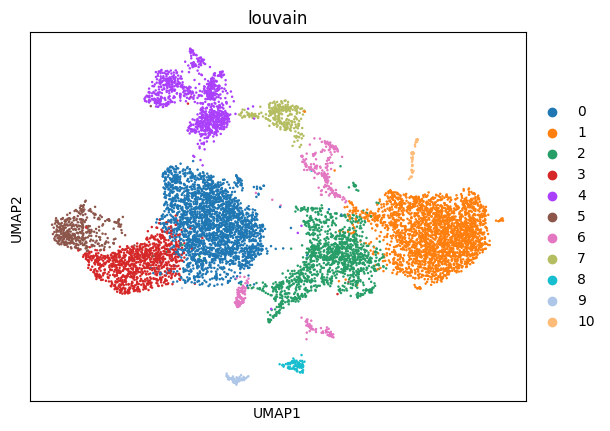

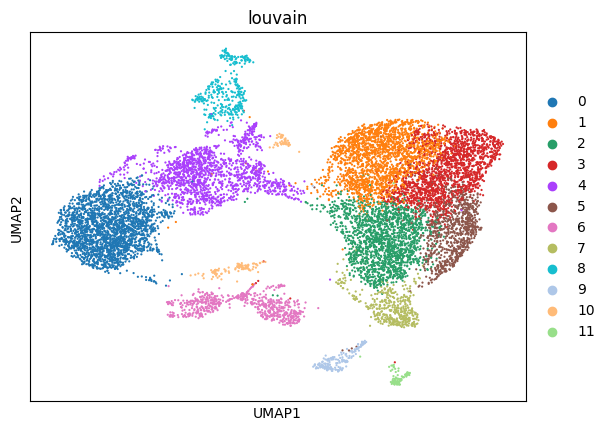

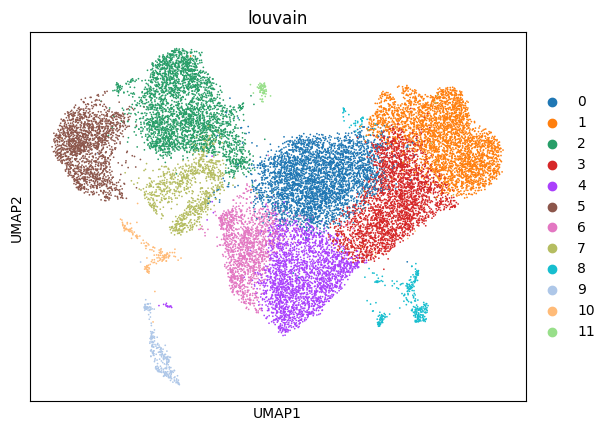

In [ ]:
sc.pl.umap(mock_data, color = "louvain")
sc.pl.umap(dpi1, color = "louvain")
sc.pl.umap(dpi2, color = "louvain")
sc.pl.umap(dpi3, color = "louvain")

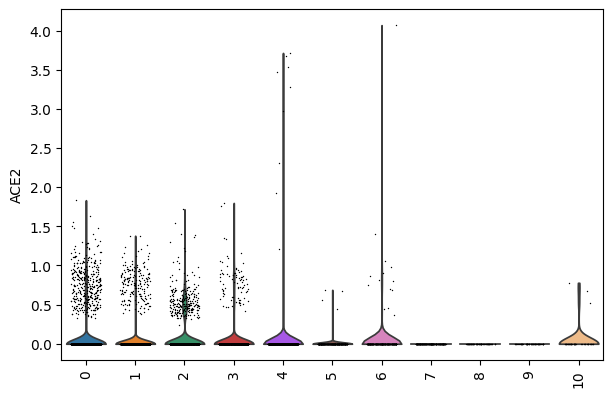

<Figure size 640x480 with 0 Axes>

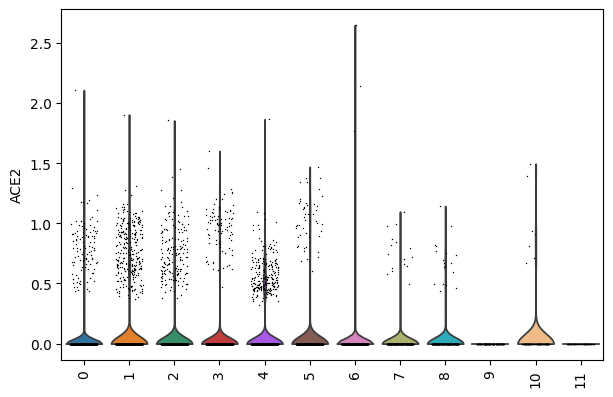

<Figure size 640x480 with 0 Axes>

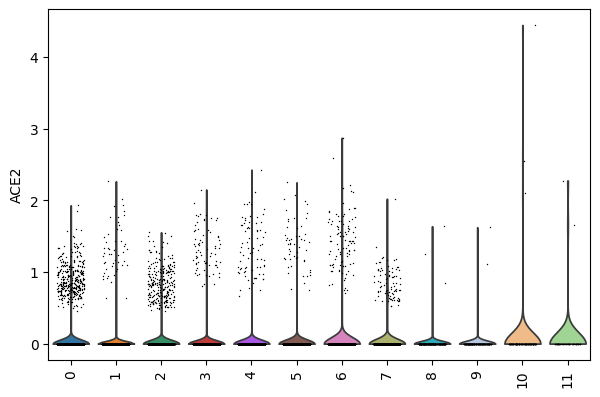

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

sc.pl.violin(dpi1, "ACE2", groupby="louvain",  rotation=90, jitter=0.3)
plt.tight_layout()

sc.pl.violin(dpi2, "ACE2", groupby="louvain",  rotation=90, jitter=0.3)
plt.tight_layout()


sc.pl.violin(dpi3, "ACE2", groupby="louvain",  rotation=90, jitter=0.3)
plt.tight_layout()

In [ ]:
import decoupler as dc

In [ ]:
markers = dc.op.resource(name= 'PanglaoDB', organism= "human")
mk = markers[markers["organ"]== "Lungs"]
mk

genesymbol  canonical_marker                         cell_type  \
                                                                      
18        ABCA3              True  Pulmonary alveolar type II cells   
31        ABCD3              True  Pulmonary alveolar type II cells   
172      ADGRF5              True  Pulmonary alveolar type II cells   
186        ADH7              True           Airway epithelial cells   
222        AGER              True   Pulmonary alveolar type I cells   
...         ...               ...                               ...   
7668    TMEM212             False                    Ciliated cells   
7700    TNFAIP2             False              Alveolar macrophages   
7852     TRIM25             False              Alveolar macrophages   
7947     TUBB4B              True                    Ciliated cells   
8031      VEGFA              True   Pulmonary alveolar type I cells   

     germ_layer  human  human_sensitivity  human_specificity  mouse  \
                                                                      
18     Endoderm   True           0.692308           0.000944   True   
31     Endoderm   True           0.000000           0.009437   True   
172    Endoderm   True           0.538462           0.015728   True   
186    Endoderm   True           0.000000           0.004386   True   
222    Endoderm   True           0.000000           0.001253   True   
...         ...    ...                ...                ...    ...   
7668   Endoderm   True           0.000000           0.000313   True   
7700   Mesoderm   True           0.000000           0.040413   True   
7852   Mesoderm   True           0.000000           0.018484   True   
7947   Endoderm   True           0.000000           0.338346   True   
8031   Endoderm   True           0.000000           0.024749   True   

      mouse_sensitivity  mouse_specificity  ncbi_tax_id  organ  \
                                                                 
18             0.007576           0.000518         9606  Lungs   
31             0.340909           0.046722         9606  Lungs   
172            0.590909           0.050023         9606  Lungs   
186            0.000000           0.006288         9606  Lungs   
222            1.000000           0.011382         9606  Lungs   
...                 ...                ...          ...    ...   
7668           0.000000           0.000000         9606  Lungs   
7700           0.000000           0.000000         9606  Lungs   
7852           0.000000           0.000000         9606  Lungs   
7947           0.000000           0.000000         9606  Lungs   
8031           0.000000           0.000000         9606  Lungs   

      ubiquitiousness  
                       
18              0.001  
31              0.041  
172             0.047  
186             0.006  
222             0.011  
...               ...  
7668            0.006  
7700            0.027  
7852            0.027  
7947            0.276  
8031            0.021  

[196 rows x 13 columns]

In [ ]:
mk = mk[mk["canonical_marker"]]
mk = mk[~mk.duplicated(["cell_type", "genesymbol"])]
mk = mk.rename(columns= {"cell_type" : "source", "genesymbol" : "target"})
mk = mk[["source", "target"]]
mk.head()

source  target
                                             
18   Pulmonary alveolar type II cells   ABCA3
31   Pulmonary alveolar type II cells   ABCD3
172  Pulmonary alveolar type II cells  ADGRF5
186           Airway epithelial cells    ADH7
222   Pulmonary alveolar type I cells    AGER

In [ ]:
dc.mt.ulm(dpi1, net = mk, tmin = 3)
dc.mt.ulm(dpi2, net = mk, tmin = 3)
dc.mt.ulm(dpi3, net = mk, tmin = 3)



In [ ]:
score1 = dc.pp.get_obsm(dpi1, key='score_ulm')
score2 = dc.pp.get_obsm(dpi2, key='score_ulm')
score3 = dc.pp.get_obsm(dpi3, key= 'score_ulm')
print(score1)
print(score2)
print(score3)

AnnData object with n_obs × n_vars = 9314 × 8
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes', 'louvain'
    uns: 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'
AnnData object with n_obs × n_vars = 11958 × 8
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_genes', 'louvain'
    uns: 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'
AnnData object with n_obs × n_vars = 19744 × 8
    obs: 'n_genes_by_cou

In [ ]:
dpi1.obsm["score_ulm"].head()


Airway epithelial cells  Airway goblet cells  \
AAACCCACAACCGCTG-1                -0.596565             4.329551   
AAACCCACAATTGAAG-1                 2.727134             5.867125   
AAACCCACACACAGAG-1                 1.202528             2.827200   
AAACCCACATCTAACG-1                 1.493972             3.595661   
AAACCCAGTCCCGGTA-1                 0.050739             2.025941   

                    Alveolar macrophages  Ciliated cells  Clara cells  \
AAACCCACAACCGCTG-1             -0.516628        8.349467     4.493363   
AAACCCACAATTGAAG-1             -0.238377        3.228645     5.742131   
AAACCCACACACAGAG-1              0.953353       -0.497835     2.442801   
AAACCCACATCTAACG-1              0.776385        0.163240     1.469268   
AAACCCAGTCCCGGTA-1              0.004532        0.946219     0.929587   

                    Ionocytes  Pulmonary alveolar type I cells  \
AAACCCACAACCGCTG-1  -0.843755                         0.210612   
AAACCCACAATTGAAG-1   1.733686                         1.257706   
AAACCCACACACAGAG-1  -0.184605                         1.293452   
AAACCCACATCTAACG-1  -0.244740                         1.791292   
AAACCCAGTCCCGGTA-1  -1.053628                        -0.695988   

                    Pulmonary alveolar type II cells  
AAACCCACAACCGCTG-1                          1.238443  
AAACCCACAATTGAAG-1                         -0.837820  
AAACCCACACACAGAG-1                         -0.073553  
AAACCCACATCTAACG-1                         -0.871904  
AAACCCAGTCCCGGTA-1                         -1.188379

In [ ]:
dpi2.obsm["score_ulm"].head()


Airway epithelial cells  Airway goblet cells  \
AAACCCACACAACATC-1                 0.037420            12.706004   
AAACCCACAGATTTCG-1                 0.297306             4.321754   
AAACCCACAGCTGTGC-1                 1.309750             1.266792   
AAACCCACAGTAGAAT-1                 1.550335             6.675145   
AAACCCAGTCACTGAT-1                 0.461817            16.012244   

                    Alveolar macrophages  Ciliated cells  Clara cells  \
AAACCCACACAACATC-1              0.846946        1.069200    16.426419   
AAACCCACAGATTTCG-1              0.621659        3.371041     5.733488   
AAACCCACAGCTGTGC-1              0.870406        0.136955     0.884279   
AAACCCACAGTAGAAT-1              2.516908        5.757605     6.847984   
AAACCCAGTCACTGAT-1              1.767586        0.434333    22.304123   

                    Ionocytes  Pulmonary alveolar type I cells  \
AAACCCACACAACATC-1   0.680815                         3.288738   
AAACCCACAGATTTCG-1  -0.943297                         2.829157   
AAACCCACAGCTGTGC-1  -0.524977                         0.715301   
AAACCCACAGTAGAAT-1  -1.042272                         1.404687   
AAACCCAGTCACTGAT-1   1.027535                         2.981062   

                    Pulmonary alveolar type II cells  
AAACCCACACAACATC-1                          2.218976  
AAACCCACAGATTTCG-1                         -0.073322  
AAACCCACAGCTGTGC-1                         -0.867863  
AAACCCACAGTAGAAT-1                         -0.250083  
AAACCCAGTCACTGAT-1                          0.075901

In [ ]:
dpi3.obsm["score_ulm"].head()

Airway epithelial cells  Airway goblet cells  \
AAACCCACAATGCTCA-1                 1.051692             6.715177   
AAACCCACACAACATC-1                 0.530792             1.344466   
AAACCCACAGAATGTA-1                 0.988871             1.960942   
AAACCCACATAATCGC-1                 1.578945            11.384558   
AAACCCAGTAGGCAGT-1                -0.499384             0.445804   

                    Alveolar macrophages  Ciliated cells  Clara cells  \
AAACCCACAATGCTCA-1              1.185024        2.009790    10.543619   
AAACCCACACAACATC-1              1.291649       -0.479720     2.923298   
AAACCCACAGAATGTA-1              1.632866        1.265256     3.265862   
AAACCCACATAATCGC-1              1.101811        0.235899    11.742129   
AAACCCAGTAGGCAGT-1              1.409078       -0.432468     0.325364   

                    Ionocytes  Pulmonary alveolar type I cells  \
AAACCCACAATGCTCA-1  -0.826500                         1.981507   
AAACCCACACAACATC-1  -0.016374                         0.553901   
AAACCCACAGAATGTA-1  -0.604662                         1.007952   
AAACCCACATAATCGC-1  -0.729902                         2.331636   
AAACCCAGTAGGCAGT-1  -0.706304                         1.993373   

                    Pulmonary alveolar type II cells  
AAACCCACAATGCTCA-1                          0.900640  
AAACCCACACAACATC-1                          0.445927  
AAACCCACAGAATGTA-1                         -0.615329  
AAACCCACATAATCGC-1                          1.334395  
AAACCCAGTAGGCAGT-1                          0.280839

In [ ]:
print(dpi1.obsm["score_ulm"].columns)
print(dpi2.obsm["score_ulm"].columns)
print(dpi3.obsm["score_ulm"].columns)

Index(['Airway epithelial cells', 'Airway goblet cells',
       'Alveolar macrophages', 'Ciliated cells', 'Clara cells', 'Ionocytes',
       'Pulmonary alveolar type I cells', 'Pulmonary alveolar type II cells'],
      dtype='object')
Index(['Airway epithelial cells', 'Airway goblet cells',
       'Alveolar macrophages', 'Ciliated cells', 'Clara cells', 'Ionocytes',
       'Pulmonary alveolar type I cells', 'Pulmonary alveolar type II cells'],
      dtype='object')
Index(['Airway epithelial cells', 'Airway goblet cells',
       'Alveolar macrophages', 'Ciliated cells', 'Clara cells', 'Ionocytes',
       'Pulmonary alveolar type I cells', 'Pulmonary alveolar type II cells'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#rank genes for the clusters
dpi1_rank = dc.tl.rankby_group(score1, groupby="louvain", reference= "rest",method= "t-test_overestim_var")
dpi1_rank = dpi1_rank[dpi1_rank["stat"]>0]
print(dpi1_rank.head())
#rank genes for the clusters
dpi2_rank = dc.tl.rankby_group(score2, groupby="louvain", reference= "rest",method= "t-test_overestim_var")
dpi2_rank = dpi2_rank[dpi2_rank["stat"]>0]
print(dpi2_rank.head())
#rank genes for the clusters
dpi3_rank = dc.tl.rankby_group(score3, groupby="louvain", reference= "rest",method= "t-test_overestim_var")
dpi3_rank = dpi3_rank[dpi3_rank["stat"]>0]
print(dpi3_rank.head())

   group reference                              name       stat  meanchange  \
0      1      rest                    Ciliated cells  98.321729    4.824332   
5      1      rest           Airway epithelial cells   7.125922    0.138500   
7      1      rest  Pulmonary alveolar type II cells   0.300967    0.007370   
12     4      rest                       Clara cells   5.961197    1.319462   
13     4      rest   Pulmonary alveolar type I cells   5.619835    0.291633   

            pval          padj  
0   0.000000e+00  0.000000e+00  
5   1.184471e-12  1.579295e-12  
7   7.634540e-01  7.634540e-01  
12  3.025286e-09  4.840458e-09  
13  2.195185e-08  2.926914e-08  
  group reference                              name       stat  meanchange  \
0     1      rest               Airway goblet cells  50.591106    6.980247   
1     1      rest  Pulmonary alveolar type II cells  41.615598    1.052137   
2     1      rest                       Clara cells  36.546227    6.632207   
4     1      re

In [ ]:
cluster_annotations1 = dpi1_rank[dpi1_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
cluster_annotations2 = dpi2_rank[dpi2_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
cluster_annotations3 = dpi3_rank[dpi3_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()



/tmp/ipython-input-2237111523.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations1 = dpi1_rank[dpi1_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
/tmp/ipython-input-2237111523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations2 = dpi2_rank[dpi2_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
/tmp/ipython-input-2237111523.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

In [ ]:
print(cluster_annotations1)
print(cluster_annotations2)
print(cluster_annotations3)

{'1': 'Ciliated cells', '4': 'Clara cells', '3': 'Pulmonary alveolar type I cells', '6': 'Airway epithelial cells', '8': 'Ionocytes', '0': 'Airway goblet cells', '5': 'Pulmonary alveolar type I cells', '2': 'Airway goblet cells', '7': 'Ciliated cells', '10': 'Pulmonary alveolar type II cells', '9': 'Ionocytes'}
{'1': 'Airway goblet cells', '4': 'Ciliated cells', '0': 'Ciliated cells', '2': 'Pulmonary alveolar type I cells', '5': 'Pulmonary alveolar type I cells', '3': 'Clara cells', '10': 'Ionocytes', '6': 'Ciliated cells', '9': 'Ionocytes', '8': 'Ciliated cells', '11': 'Ionocytes'}
{'2': 'Ciliated cells', '8': 'Ionocytes', '7': 'Ciliated cells', '0': 'Pulmonary alveolar type I cells', '5': 'Ciliated cells', '6': 'Airway goblet cells', '4': 'Clara cells', '3': 'Airway epithelial cells', '10': 'Ciliated cells', '9': 'Alveolar macrophages', '11': 'Ionocytes'}


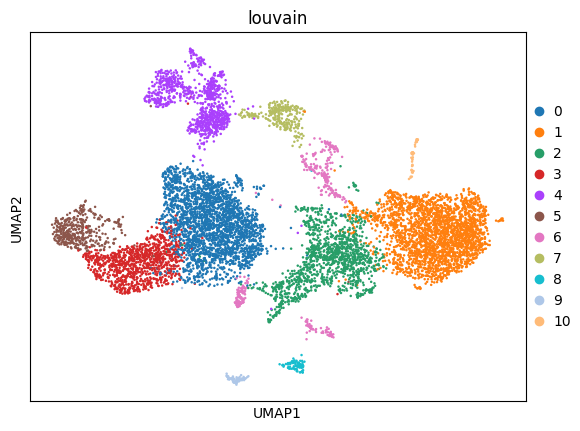

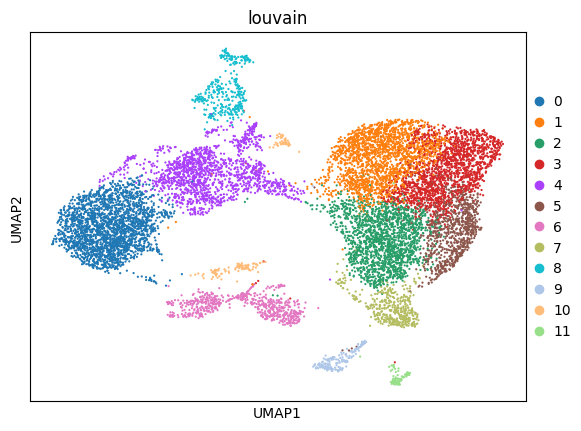

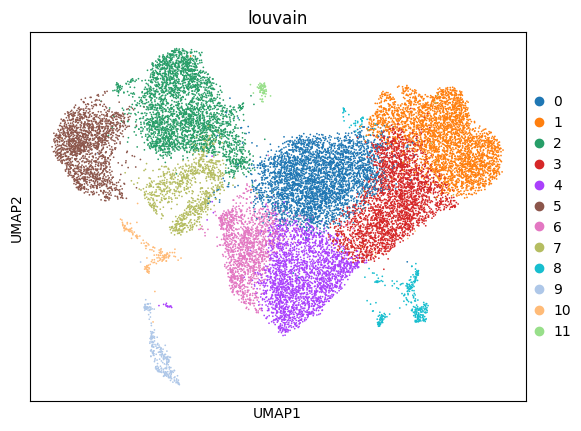

In [ ]:
sc.pl.umap(adata= dpi1, color= ["louvain"], ncols= 1)
sc.pl.umap(adata= dpi2, color= ["louvain"], ncols= 1)
sc.pl.umap(adata= dpi3, color= ["louvain"], ncols= 1)

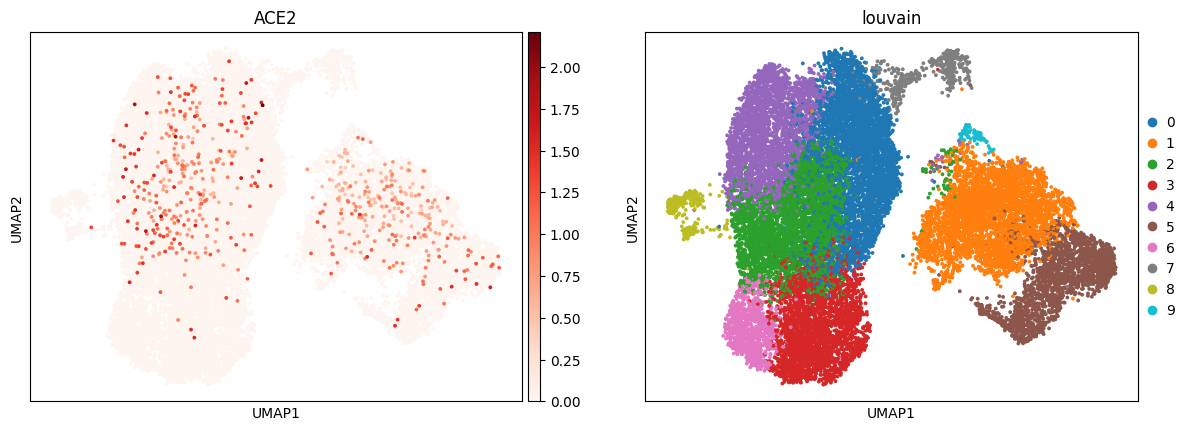

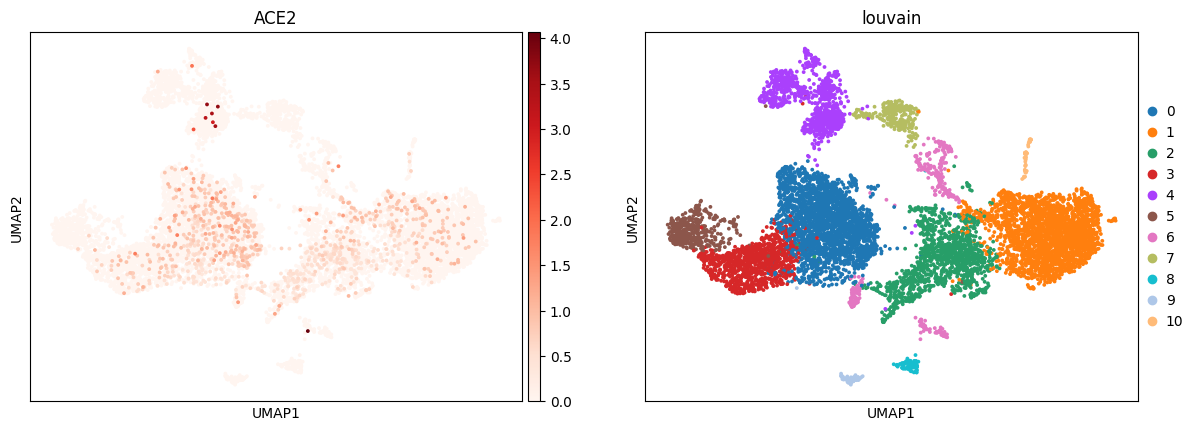

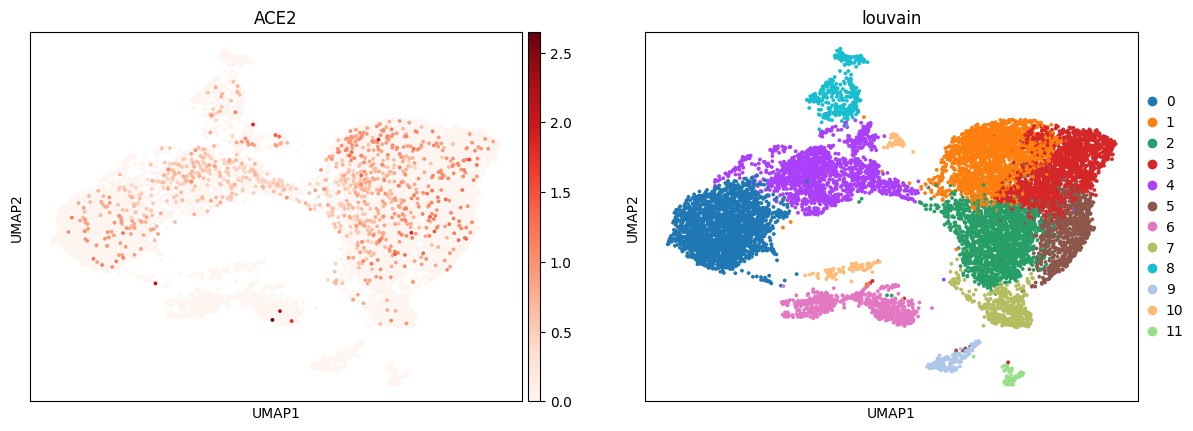

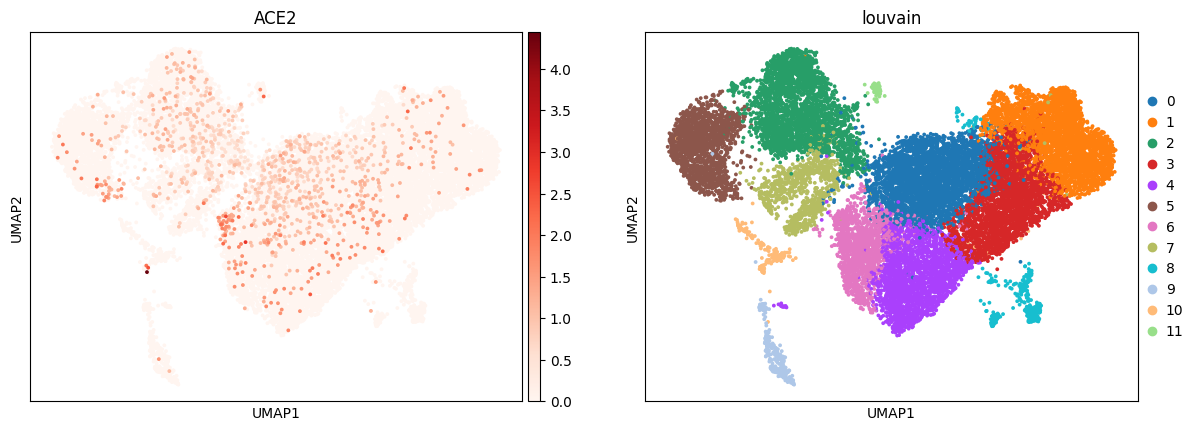

In [ ]:
sc.pl.umap(mock_data, color=["ACE2", "louvain"],layer=None, cmap='Reds', size= 30)
sc.pl.umap(dpi1, color=["ACE2", "louvain"],layer=None, cmap='Reds', size= 30)
sc.pl.umap(dpi2, color=["ACE2","louvain"],layer=None, cmap='Reds', size= 30)
sc.pl.umap(dpi3, color=["ACE2","louvain"],layer=None, cmap='Reds', size= 30)

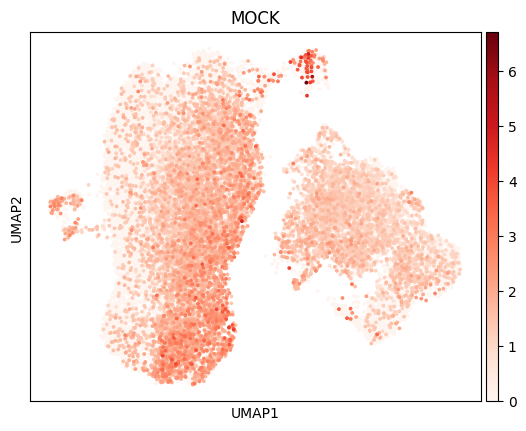

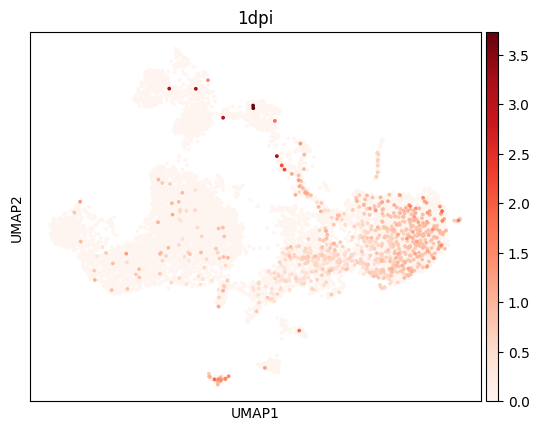

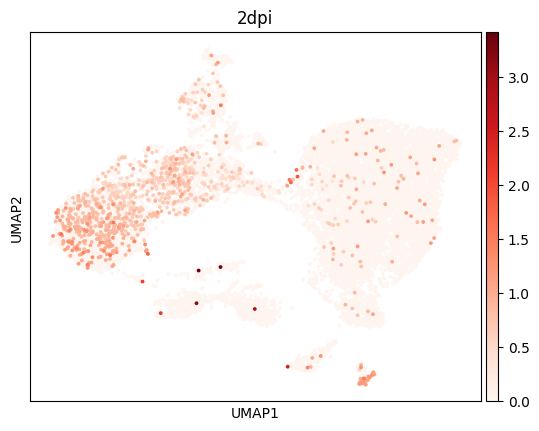

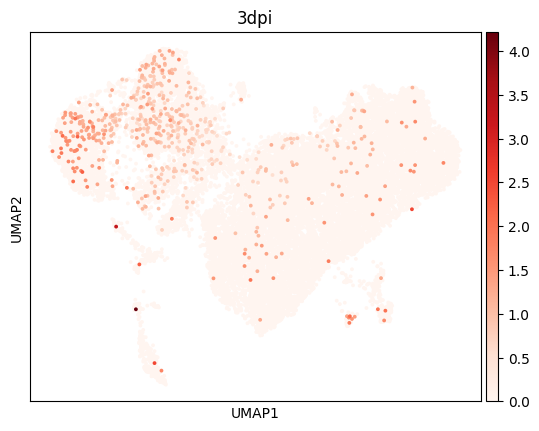

In [ ]:
sc.pl.umap(mock_data, color="ENO2",layer=None, cmap='Reds', size= 30, title= 'MOCK')
sc.pl.umap(dpi1, color="ENO2",layer=None, cmap='Reds', size= 30, title= '1dpi')
sc.pl.umap(dpi2, color="ENO2",layer=None, cmap='Reds', size= 30, title= '2dpi')
sc.pl.umap(dpi3, color="ENO2",layer=None, cmap='Reds', size= 30, title= '3dpi')